# Image compression using K-means Clustering

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from utils import *


In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.

In [27]:
def find_closest_centroids(X, centroids):
    # Set K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for j in range(X.shape[0]):
        var = float('inf')
        for i in range(K):
            dist = linalg.norm((X[j] - centroids[i]) ** 2)
            if dist < var:
                ind = i
                var = dist

        idx[j] = ind

    return idx


Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

In [28]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for i in range(K):
        counter = 0
        for j in range(m):
            if idx[j] == i:
                centroids[i] += X[j]
                counter += 1

        centroids[i] /= counter

    return centroids

The K-mean algorithm:

In [29]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)

    for i in range(max_iters):

        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

A good strategy for initializing the centroids is to select random examples from the training set.



In [30]:
def kMeans_init_centroids(X, K):
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

## Image compression with K-means

Each pixel of an image is treated as a data point in RGB space. K-means is applied to cluster pixels into 16 representative colors, which are then used to replace the original colors. This reduces storage needs by keeping only 16 color values and assigning each pixel to one of them, effectively compressing the image.

In [31]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

*Visualize image*

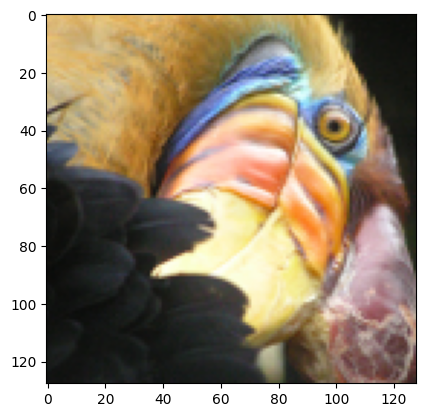

In [32]:
# Visualizing the image
plt.imshow(original_img)

*Check the dimension of the variable*

In [34]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [35]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Run K-Means on the pre-processed image.

In [36]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


### Compress the image


In [37]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, you can view the effects of the compression by reconstructing the image based only on the centroid assignments.
* Specifically, you can replace each pixel location with the mean of the centroid assigned to it.

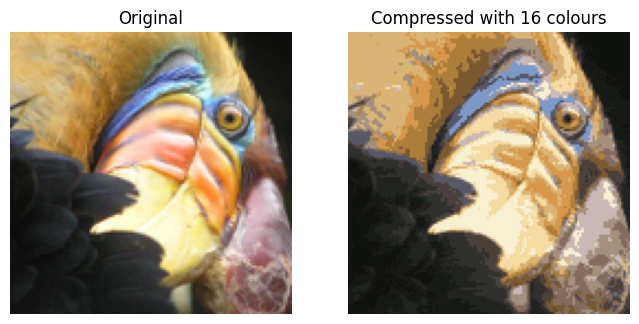

In [38]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()